In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/freight-dataset/Training_Data.xlsx


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
file_path = '/kaggle/input/freight-dataset/Training_Data.xlsx'
df = pd.read_excel(file_path)
df.sample(10)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
12655,SHIP012655,Lucknow,Chennai,2023-07-12,2023-07-17,2023-07-20,Truck,1549,Storm,Light,Yes
6945,SHIP006945,Bangalore,Chennai,2023-09-27,2023-09-30,2023-10-07,Lorry,935,Fog,Light,Yes
16415,SHIP016415,Bangalore,Kolkata,2023-07-05,2023-07-11,2023-07-11,Container,1869,Clear,Light,No
4219,SHIP004219,Mumbai,Bangalore,2023-02-04,2023-02-06,2023-02-07,Trailer,658,Clear,Moderate,Yes
12856,SHIP012856,Bangalore,Pune,2023-01-28,2023-02-03,2023-02-07,Truck,1885,Clear,Moderate,Yes
187,SHIP000187,Bangalore,Jaipur,2023-10-08,2023-10-14,2023-10-22,Truck,1960,Fog,Heavy,Yes
2709,SHIP002709,Ahmedabad,Mumbai,2023-09-24,2023-09-27,2023-09-29,Trailer,1022,Clear,Light,Yes
3428,SHIP003428,Mumbai,Kolkata,2024-03-18,2024-03-22,2024-03-23,Trailer,1418,Clear,Moderate,Yes
10415,SHIP010415,Delhi,Jaipur,2024-01-15,2024-01-24,2024-01-20,Container,1693,Rain,Light,Yes
17493,SHIP017493,Mumbai,Ahmedabad,2023-01-13,2023-01-15,2023-01-20,Container,617,Clear,Heavy,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


In [5]:
df.describe()

,Shipment Date,Planned Delivery Date,Actual Delivery Date,Distance (km)
count,20000,20000,20000,20000.000000
mean,2023-09-16 08:39:28.800000,2023-09-19 15:07:24.960000256,2023-09-21 13:34:45.120000,1101.663750
min,2023-01-01 00:00:00,2023-01-02 00:00:00,2023-01-02 00:00:00,200.000000
25%,2023-05-09 00:00:00,2023-05-13 00:00:00,2023-05-15 00:00:00,649.750000
50%,2023-09-16 00:00:00,2023-09-20 00:00:00,2023-09-21 00:00:00,1102.000000
75%,2024-01-25 00:00:00,2024-01-29 00:00:00,2024-01-31 00:00:00,1551.000000
max,2024-06-01 00:00:00,2024-06-08 00:00:00,2024-06-12 00:00:00,2000.000000
std,NaN,NaN,NaN,520.717873


In [6]:
df.describe(include='all')

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
count,20000,20000,20000,20000,20000,20000,19403,20000.000000,20000,20000,20000
unique,20000,10,10,NaN,NaN,NaN,4,NaN,4,3,2
top,SHIP000000,Pune,Jaipur,NaN,NaN,NaN,Lorry,NaN,Clear,Light,Yes
freq,1,2117,2044,NaN,NaN,NaN,4878,NaN,13952,9950,14757
mean,NaN,NaN,NaN,2023-09-16 08:39:28.800000,2023-09-19 15:07:24.960000256,2023-09-21 13:34:45.120000,NaN,1101.663750,NaN,NaN,NaN
min,NaN,NaN,NaN,2023-01-01 00:00:00,2023-01-02 00:00:00,2023-01-02 00:00:00,NaN,200.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2023-05-09 00:00:00,2023-05-13 00:00:00,2023-05-15 00:00:00,NaN,649.750000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2023-09-16 00:00:00,2023-09-20 00:00:00,2023-09-21 00:00:00,NaN,1102.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2024-01-25 00:00:00,2024-01-29 00:00:00,2024-01-31 00:00:00,NaN,1551.000000,NaN,NaN,NaN
max,NaN,NaN,NaN,2024-06-01 00:00:00,2024-06-08 00:00:00,2024-06-12 00:00:00,NaN,2000.000000,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [8]:
df['Delivery Delay Days'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.days

In [9]:
df['Delayed'] = df['Delayed'].map({'Yes': 1, 'No': 0})

In [10]:
delayed_counts = df['Delayed'].value_counts()
delayed_counts

Delayed
1    14757
0     5243
Name: count, dtype: int64

In [11]:
df = df.dropna(subset=['Vehicle Type'])

In [12]:
print(df.isnull().sum())

Shipment ID              0
Origin                   0
Destination              0
Shipment Date            0
Planned Delivery Date    0
Actual Delivery Date     0
Vehicle Type             0
Distance (km)            0
Weather Conditions       0
Traffic Conditions       0
Delayed                  0
Delivery Delay Days      0
dtype: int64


In [13]:
df.sample(5)

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Delivery Delay Days
10101,SHIP010101,Mumbai,Delhi,2023-12-09,2023-12-15,2023-12-17,Container,1846,Clear,Heavy,1,2
15529,SHIP015529,Pune,Ahmedabad,2023-06-03,2023-06-06,2023-06-09,Lorry,1003,Fog,Moderate,1,3
7280,SHIP007280,Lucknow,Delhi,2023-04-27,2023-04-29,2023-04-30,Lorry,781,Clear,Moderate,1,1
14567,SHIP014567,Delhi,Chennai,2023-10-02,2023-10-04,2023-10-04,Lorry,793,Clear,Light,0,0
13010,SHIP013010,Pune,Lucknow,2023-06-19,2023-06-21,2023-06-27,Lorry,724,Rain,Moderate,1,6


In [14]:
df = df.drop(columns=['Shipment ID', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date'])

In [15]:
df.sample(5)

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Delivery Delay Days
4616,Kolkata,Lucknow,Lorry,1140,Clear,Heavy,1,2
19268,Chennai,Ahmedabad,Trailer,492,Clear,Moderate,1,6
6705,Mumbai,Chennai,Lorry,364,Clear,Light,0,0
6712,Kolkata,Delhi,Container,655,Clear,Light,0,0
3392,Kolkata,Hyderabad,Trailer,266,Clear,Light,1,3


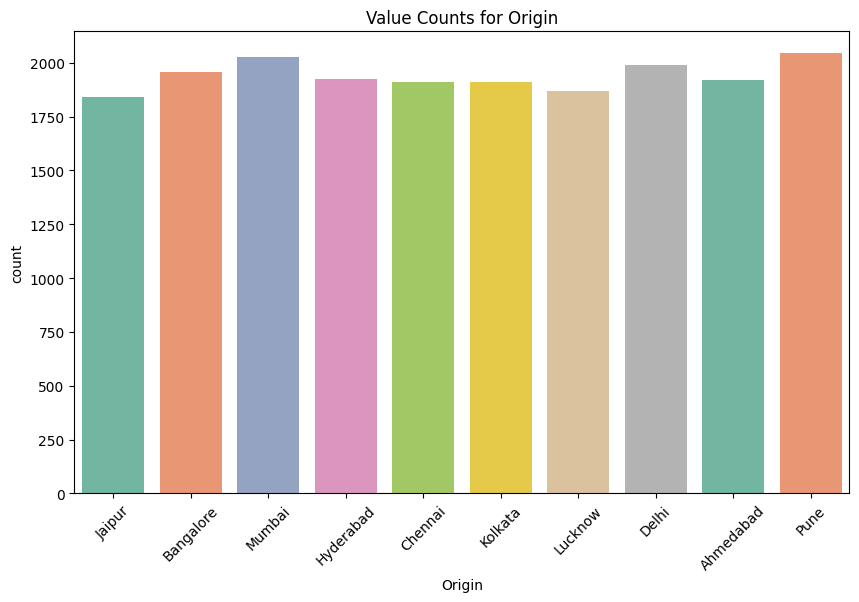

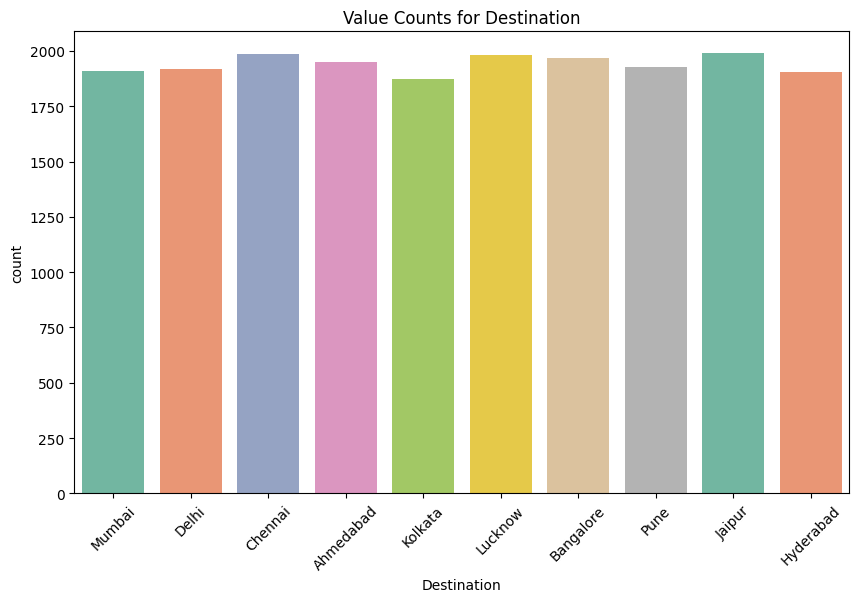

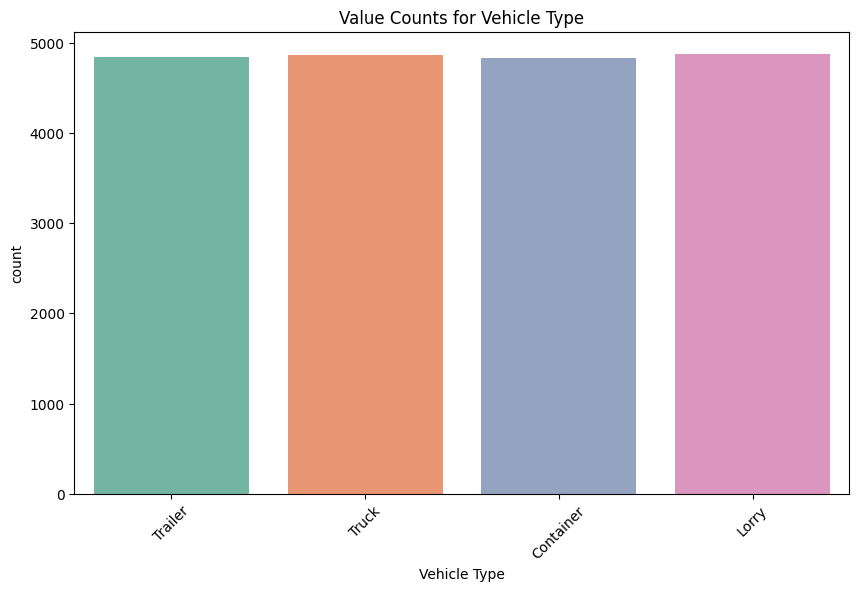

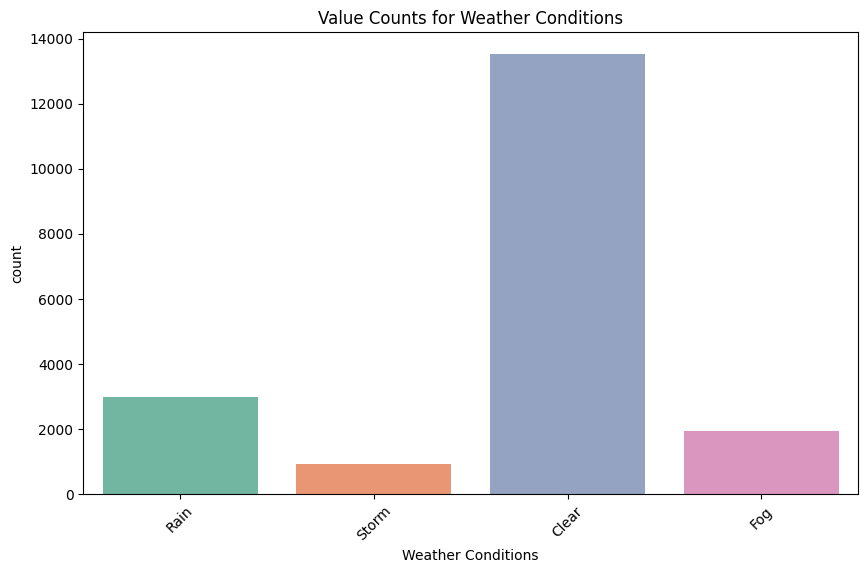

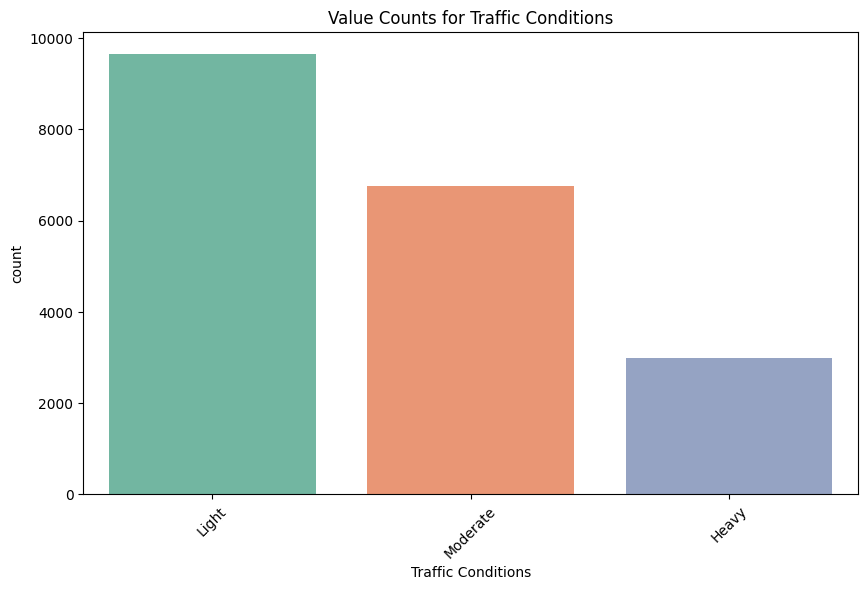

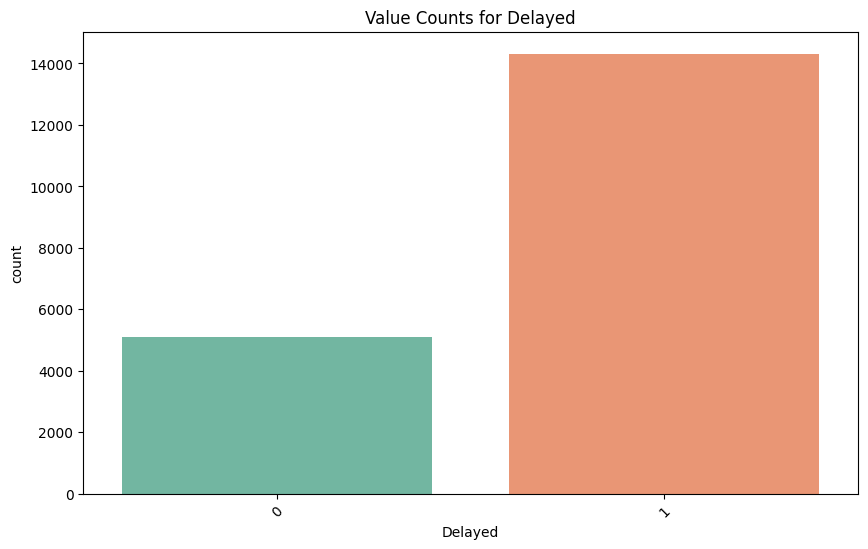

In [16]:
columns_to_plot = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions', 'Delayed']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))  
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f"Value Counts for {column}")
    plt.xticks(rotation=45)
    plt.show()  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


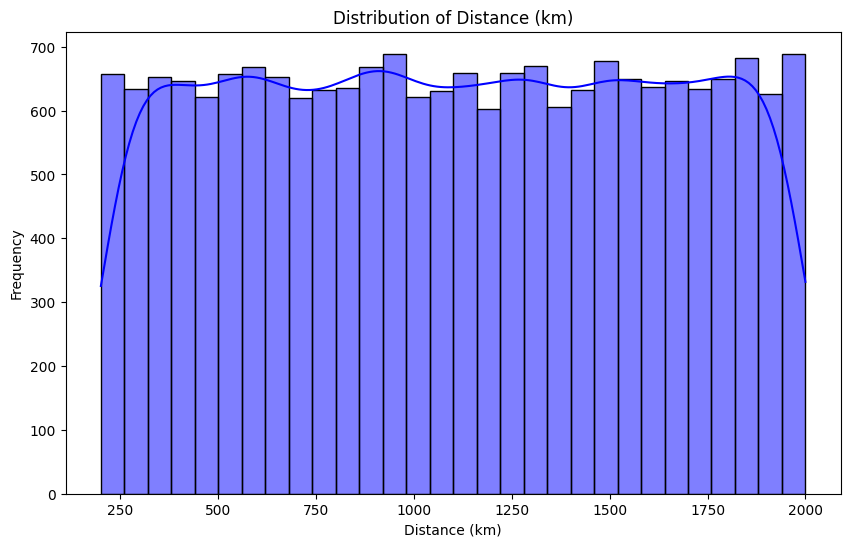

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance (km)'], bins=30, kde=True, color='blue')
plt.title("Distribution of Distance (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


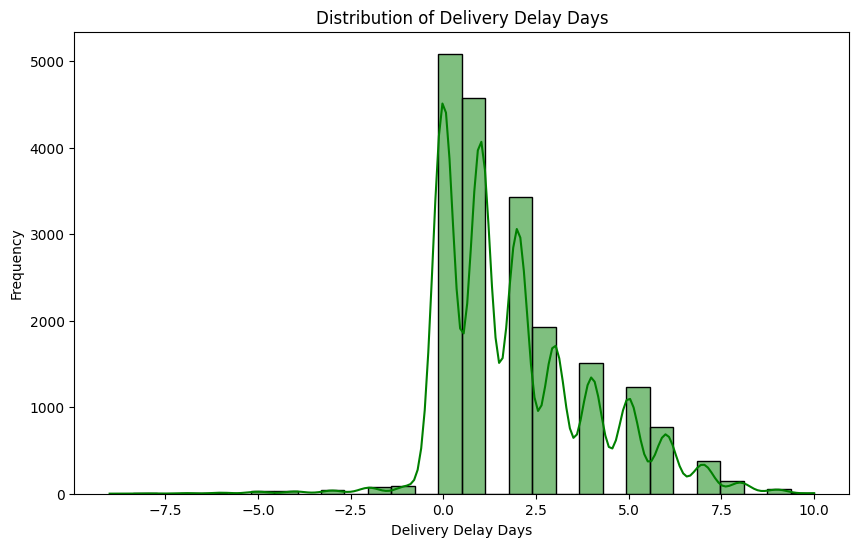

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery Delay Days'], bins=30, kde=True, color='green')
plt.title("Distribution of Delivery Delay Days")
plt.xlabel("Delivery Delay Days")
plt.ylabel("Frequency")
plt.show()

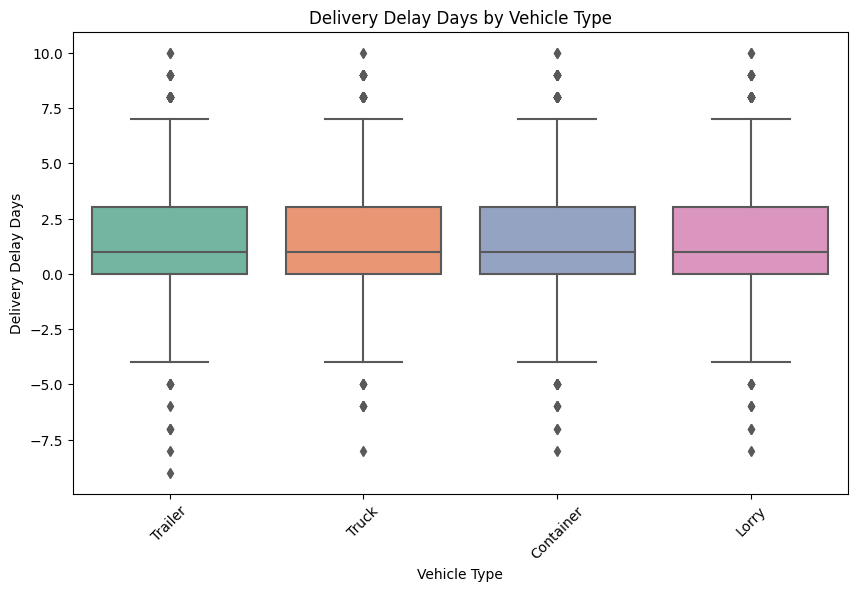

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Type', y='Delivery Delay Days', data=df, palette='Set2')
plt.title("Delivery Delay Days by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

In [20]:
df = df.drop(columns=['Delivery Delay Days'])

In [21]:
df

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,Jaipur,Mumbai,Trailer,1603,Rain,Light,1
1,Bangalore,Delhi,Trailer,1237,Storm,Moderate,1
2,Mumbai,Chennai,Truck,1863,Clear,Light,0
3,Hyderabad,Ahmedabad,Container,1374,Clear,Light,0
4,Chennai,Kolkata,Container,676,Clear,Heavy,1
...,...,...,...,...,...,...,...
19995,Chennai,Bangalore,Truck,564,Fog,Moderate,1
19996,Hyderabad,Jaipur,Truck,305,Storm,Moderate,1
19997,Hyderabad,Mumbai,Trailer,1028,Rain,Moderate,1
19998,Ahmedabad,Chennai,Lorry,905,Fog,Moderate,1


In [22]:
print("Categories in 'Origin':")
print(df['Origin'].unique())

print("\nCategories in 'Destination':")
print(df['Destination'].unique())

print("\nCategories in 'Vehicle Type':")
print(df['Vehicle Type'].unique())

print("\nCategories in 'Weather Conditions':")
print(df['Weather Conditions'].unique())

print("\nCategories in 'Traffic Conditions':")
print(df['Traffic Conditions'].unique())

Categories in 'Origin':
['Jaipur' 'Bangalore' 'Mumbai' 'Hyderabad' 'Chennai' 'Kolkata' 'Lucknow'
 'Delhi' 'Ahmedabad' 'Pune']

Categories in 'Destination':
['Mumbai' 'Delhi' 'Chennai' 'Ahmedabad' 'Kolkata' 'Lucknow' 'Bangalore'
 'Pune' 'Jaipur' 'Hyderabad']

Categories in 'Vehicle Type':
['Trailer' 'Truck' 'Container' 'Lorry']

Categories in 'Weather Conditions':
['Rain' 'Storm' 'Clear' 'Fog']

Categories in 'Traffic Conditions':
['Light' 'Moderate' 'Heavy']


In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

one_hot_cols = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions']
ordinal_col = 'Traffic Conditions'

one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[one_hot_cols])

one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(one_hot_cols)

df[one_hot_encoded_columns] = one_hot_encoded

df.drop(columns=one_hot_cols, inplace=True)

traffic_mapping = ['Light', 'Moderate', 'Heavy']
ordinal_encoder = OrdinalEncoder(categories=[traffic_mapping])
df[ordinal_col] = ordinal_encoder.fit_transform(df[[ordinal_col]])

df

,Distance (km),Traffic Conditions,Delayed,Origin_Ahmedabad,Origin_Bangalore,Origin_Chennai,Origin_Delhi,Origin_Hyderabad,Origin_Jaipur,Origin_Kolkata,...,Destination_Mumbai,Destination_Pune,Vehicle Type_Container,Vehicle Type_Lorry,Vehicle Type_Trailer,Vehicle Type_Truck,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm
0,1603,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1237,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1863,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1374,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,676,2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,564,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19996,305,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19997,1028,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19998,905,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
! pip install imbalanced-learn

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['Delayed'])
y = df['Delayed']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({1: 14319, 0: 5084})
After SMOTE: Counter({1: 14319, 0: 14319})


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (20046, 30)
Testing data shape: (8592, 30)


In [27]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [28]:
dt_predictions = dt_model.predict(X_test)

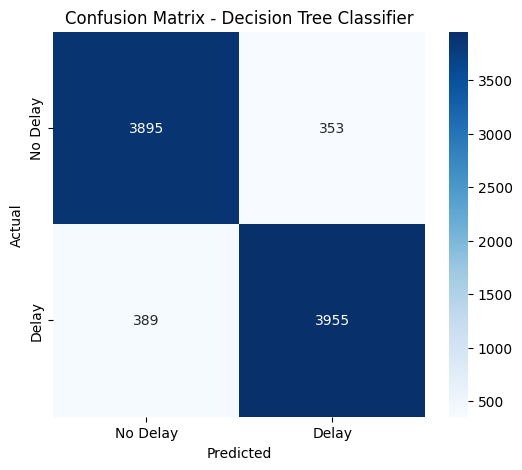

Decision Tree Classifier:
Accuracy: 0.9136405959031657
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      4248
           1       0.92      0.91      0.91      4344

    accuracy                           0.91      8592
   macro avg       0.91      0.91      0.91      8592
weighted avg       0.91      0.91      0.91      8592



In [29]:
dt_cm = confusion_matrix(y_test, dt_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(dt_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))

In [30]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rf_predictions = rf_model.predict(X_test)

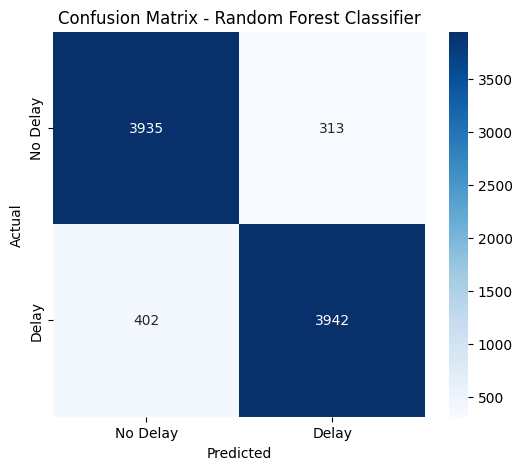

Random Forest Classifier:
Accuracy: 0.9167830540037244
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      4248
           1       0.93      0.91      0.92      4344

    accuracy                           0.92      8592
   macro avg       0.92      0.92      0.92      8592
weighted avg       0.92      0.92      0.92      8592



In [32]:
rf_cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

In [33]:

xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [34]:
xgb_predictions = xgb_model.predict(X_test)

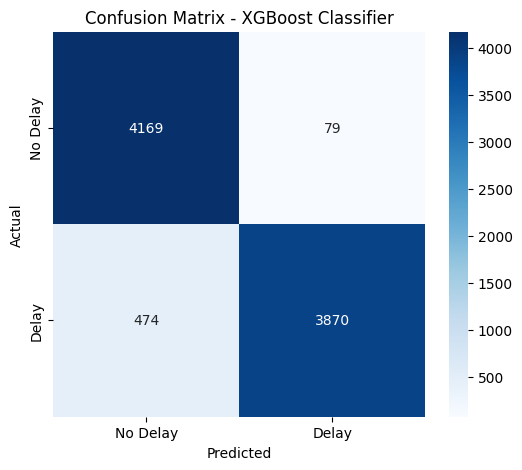

XGBoost Classifier:
Accuracy: 0.9356378026070763
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      4248
           1       0.98      0.89      0.93      4344

    accuracy                           0.94      8592
   macro avg       0.94      0.94      0.94      8592
weighted avg       0.94      0.94      0.94      8592



In [35]:
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Delay', 'Delay'], yticklabels=['No Delay', 'Delay'])
plt.title("Confusion Matrix - XGBoost Classifier")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

In [37]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')

xgb_model_loaded = joblib.load('xgb_model.pkl')

# Verify the loaded model
print(xgb_model_loaded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
